## Perbandingan Metode Klasifikasi Data menggunakan Dataset Penguin

```

~~~

In [1]:
# Library Utama
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Library Preprocessing Data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Library Supervised Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA


# Library Evaluation Model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Additional
from sklearn import datasets, decomposition
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
# from streamlit_navigation_bar import st_navbar
# import time
# from streamlit_extras.let_it_rain import rain
# from st_aggrid import AgGrid, GridOptionsBuilder
# import mpl_toolkits.mplot3d

### 1. Akuisisi Data

In [2]:
dataset = sns.load_dataset("penguins")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [3]:
print(dataset)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex
0    Adelie  Torgersen            39.1           18.7              181.0       3750.0    Male
1    Adelie  Torgersen            39.5           17.4              186.0       3800.0  Female
2    Adelie  Torgersen            40.3           18.0              195.0       3250.0  Female
3    Adelie  Torgersen             NaN            NaN                NaN          NaN     NaN
4    Adelie  Torgersen            36.7           19.3              193.0       3450.0  Female
..      ...        ...             ...            ...                ...          ...     ...
339  Gentoo     Biscoe             NaN            NaN                NaN          NaN     NaN
340  Gentoo     Biscoe            46.8           14.3              215.0       4850.0  Female
341  Gentoo     Biscoe            50.4           15.7              222.0       5750.0    Male
342  Gentoo     Biscoe            45.2           14.8       

### 2. Praproses Data

In [4]:
dataset.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
dataset = dataset.bfill()
print(dataset)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex
0    Adelie  Torgersen            39.1           18.7              181.0       3750.0    Male
1    Adelie  Torgersen            39.5           17.4              186.0       3800.0  Female
2    Adelie  Torgersen            40.3           18.0              195.0       3250.0  Female
3    Adelie  Torgersen            36.7           19.3              193.0       3450.0  Female
4    Adelie  Torgersen            36.7           19.3              193.0       3450.0  Female
..      ...        ...             ...            ...                ...          ...     ...
339  Gentoo     Biscoe            46.8           14.3              215.0       4850.0  Female
340  Gentoo     Biscoe            46.8           14.3              215.0       4850.0  Female
341  Gentoo     Biscoe            50.4           15.7              222.0       5750.0    Male
342  Gentoo     Biscoe            45.2           14.8       

In [6]:
dataset.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [7]:
dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.909302,17.149128,200.933140,4201.453488
std,5.459789,1.978440,14.047759,801.407332
min,32.100000,13.100000,172.000000,2700.000000
25%,39.200000,15.575000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.250000,4756.250000
max,59.600000,21.500000,231.000000,6300.000000


### 3. Eksplorasi Data Analisis

- Cek unique value

In [8]:
dataset["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [9]:
dataset["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

- Visualisasi Data

In [10]:
df = dataset[["species", "island"]].value_counts().reset_index(name="jumlah").sort_values("jumlah", ascending=False)
df

,species,island,jumlah
0,Gentoo,Biscoe,124
1,Chinstrap,Dream,68
2,Adelie,Dream,56
3,Adelie,Torgersen,52
4,Adelie,Biscoe,44


In [11]:
df = pd.melt(dataset, id_vars=["species"], value_vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"], var_name="Stats", value_name="Value")
df

,species,Stats,Value
0,Adelie,bill_length_mm,39.1
1,Adelie,bill_length_mm,39.5
2,Adelie,bill_length_mm,40.3
3,Adelie,bill_length_mm,36.7
4,Adelie,bill_length_mm,36.7
...,...,...,...
1371,Gentoo,body_mass_g,4850.0
1372,Gentoo,body_mass_g,4850.0
1373,Gentoo,body_mass_g,5750.0
1374,Gentoo,body_mass_g,5200.0


In [12]:
df = dataset["island"].value_counts().reset_index(name="jumlah")
df

,island,jumlah
0,Biscoe,168
1,Dream,124
2,Torgersen,52


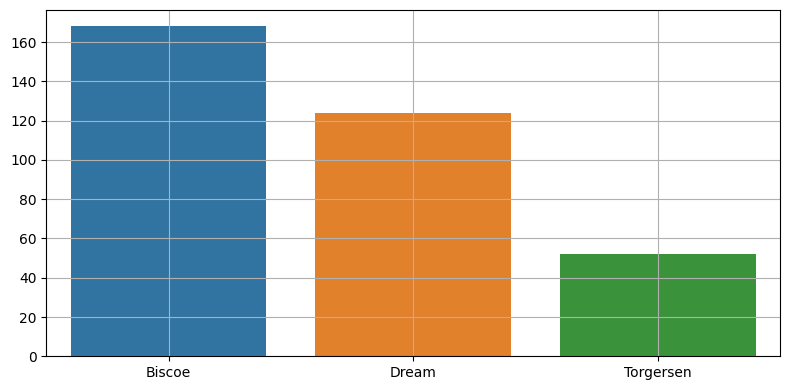

In [13]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=df, x="island", y="jumlah", hue="island")

ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)

plt.tight_layout()
plt.show()

In [14]:
df = dataset["species"].value_counts().reset_index(name="jumlah")
df

,species,jumlah
0,Adelie,152
1,Gentoo,124
2,Chinstrap,68


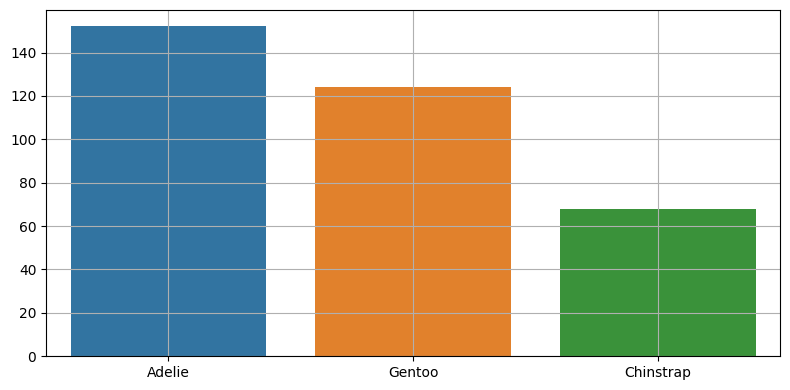

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=df, x="species", y="jumlah", hue="species")

ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)

plt.tight_layout()
plt.show()

In [16]:
df = dataset["island"].value_counts().reset_index(name="jumlah")
df

,island,jumlah
0,Biscoe,168
1,Dream,124
2,Torgersen,52


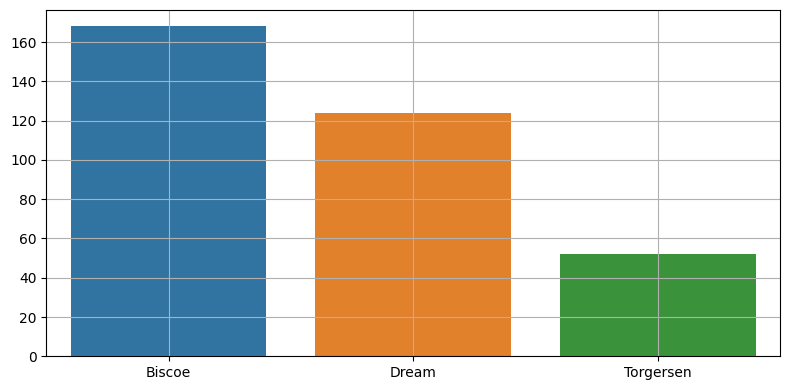

In [17]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=df, x="island", y="jumlah", hue="island")

ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)

plt.tight_layout()
plt.show()

### 4. Pembagian Data

In [18]:
print(dataset)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex
0    Adelie  Torgersen            39.1           18.7              181.0       3750.0    Male
1    Adelie  Torgersen            39.5           17.4              186.0       3800.0  Female
2    Adelie  Torgersen            40.3           18.0              195.0       3250.0  Female
3    Adelie  Torgersen            36.7           19.3              193.0       3450.0  Female
4    Adelie  Torgersen            36.7           19.3              193.0       3450.0  Female
..      ...        ...             ...            ...                ...          ...     ...
339  Gentoo     Biscoe            46.8           14.3              215.0       4850.0  Female
340  Gentoo     Biscoe            46.8           14.3              215.0       4850.0  Female
341  Gentoo     Biscoe            50.4           15.7              222.0       5750.0    Male
342  Gentoo     Biscoe            45.2           14.8       

- Set variabel bebas dan variabel terikat

In [19]:
x = dataset[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].values
y = dataset["island"]

- Normalisasi data

In [20]:
Scaler = MinMaxScaler(feature_range=(0,1))
Scaled = Scaler.fit_transform(x)

- Split validasi

In [21]:
TrainX, TestX, TrainY, TestY = train_test_split(
    Scaled, y, train_size=0.9, test_size=0.1, random_state=7, shuffle=True
)

- Dimensi data latih

In [22]:
print(TrainX.shape, TrainY.shape)

(309, 4) (309,)


- Dimensi data uji

In [23]:
print(TestX.shape, TestY.shape)

(35, 4) (35,)


### 5. Modelling Klasifikasi Algoritma

- 1 · Support Vector Classifier (SVC)

In [24]:
Result_SVC = SVC(kernel='rbf').fit(TrainX, TrainY).predict(TestX)
Result_SVC

array(['Dream', 'Dream', 'Dream', 'Biscoe', 'Dream', 'Dream', 'Biscoe',
       'Biscoe', 'Dream', 'Dream', 'Dream', 'Dream', 'Dream', 'Dream',
       'Dream', 'Biscoe', 'Biscoe', 'Dream', 'Dream', 'Dream', 'Dream',
       'Biscoe', 'Dream', 'Biscoe', 'Biscoe', 'Dream', 'Biscoe', 'Dream',
       'Dream', 'Dream', 'Dream', 'Dream', 'Biscoe', 'Biscoe', 'Biscoe'],
      dtype=object)

In [25]:
print(confusion_matrix(TestY, Result_SVC))

[[12  5  0]
 [ 0 13  0]
 [ 0  5  0]]


In [26]:
print(classification_report(TestY, Result_SVC, zero_division=1))

              precision    recall  f1-score   support

      Biscoe       1.00      0.71      0.83        17
       Dream       0.57      1.00      0.72        13
   Torgersen       1.00      0.00      0.00         5

    accuracy                           0.71        35
   macro avg       0.86      0.57      0.52        35
weighted avg       0.84      0.71      0.67        35



In [27]:
clf = SVC()
clf.fit(TrainX, TrainY) 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
    gamma=0.0, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)
print(clf.predict(TestX))


['Dream' 'Dream' 'Dream' 'Biscoe' 'Dream' 'Dream' 'Biscoe' 'Biscoe'
 'Dream' 'Dream' 'Dream' 'Dream' 'Dream' 'Dream' 'Dream' 'Biscoe' 'Biscoe'
 'Dream' 'Dream' 'Dream' 'Dream' 'Biscoe' 'Dream' 'Biscoe' 'Biscoe'
 'Dream' 'Biscoe' 'Dream' 'Dream' 'Dream' 'Dream' 'Dream' 'Biscoe'
 'Biscoe' 'Biscoe']


In [28]:
print(confusion_matrix(TestY, Result_SVC))

[[12  5  0]
 [ 0 13  0]
 [ 0  5  0]]


- 2 · Logistic Regression (LR)

In [29]:
Result_LR = LogisticRegression(max_iter=1000).fit(TrainX, TrainY).predict(TestX)
Result_LR

array(['Dream', 'Dream', 'Dream', 'Biscoe', 'Dream', 'Dream', 'Biscoe',
       'Biscoe', 'Dream', 'Dream', 'Dream', 'Dream', 'Dream', 'Dream',
       'Dream', 'Biscoe', 'Biscoe', 'Biscoe', 'Dream', 'Dream', 'Dream',
       'Biscoe', 'Dream', 'Biscoe', 'Biscoe', 'Dream', 'Biscoe', 'Dream',
       'Dream', 'Dream', 'Dream', 'Dream', 'Biscoe', 'Biscoe', 'Biscoe'],
      dtype=object)

In [30]:
print(confusion_matrix(TestY, Result_LR))

[[12  5  0]
 [ 0 13  0]
 [ 1  4  0]]


In [31]:
print(classification_report(TestY, Result_LR, zero_division=1))

              precision    recall  f1-score   support

      Biscoe       0.92      0.71      0.80        17
       Dream       0.59      1.00      0.74        13
   Torgersen       1.00      0.00      0.00         5

    accuracy                           0.71        35
   macro avg       0.84      0.57      0.51        35
weighted avg       0.81      0.71      0.66        35



- 3 · Quadratic Discriminant Analysis (QDA)

In [32]:
Result_QDA = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, tol=0.0001).fit(TrainX, TrainY).predict(TestX)
Result_QDA


array(['Dream', 'Dream', 'Dream', 'Biscoe', 'Dream', 'Dream', 'Biscoe',
       'Biscoe', 'Dream', 'Biscoe', 'Torgersen', 'Dream', 'Torgersen',
       'Dream', 'Dream', 'Biscoe', 'Biscoe', 'Dream', 'Torgersen',
       'Torgersen', 'Dream', 'Biscoe', 'Dream', 'Biscoe', 'Biscoe',
       'Torgersen', 'Biscoe', 'Dream', 'Dream', 'Dream', 'Dream',
       'Torgersen', 'Biscoe', 'Biscoe', 'Biscoe'], dtype=object)

In [33]:
print(confusion_matrix(TestY, Result_QDA))

[[13  2  2]
 [ 0 10  3]
 [ 0  4  1]]


In [34]:
print(classification_report(TestY, Result_QDA))

              precision    recall  f1-score   support

      Biscoe       1.00      0.76      0.87        17
       Dream       0.62      0.77      0.69        13
   Torgersen       0.17      0.20      0.18         5

    accuracy                           0.69        35
   macro avg       0.60      0.58      0.58        35
weighted avg       0.74      0.69      0.70        35



- 4 · Linear Discriminant Analysis (LDA)

In [35]:
Result_LDA = LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None, solver='svd', store_covariance=False, tol=0.0001).fit(TrainX, TrainY).predict(TestX)
Result_LDA

array(['Dream', 'Dream', 'Dream', 'Biscoe', 'Dream', 'Dream', 'Biscoe',
       'Biscoe', 'Dream', 'Dream', 'Torgersen', 'Dream', 'Torgersen',
       'Dream', 'Torgersen', 'Biscoe', 'Biscoe', 'Dream', 'Torgersen',
       'Dream', 'Dream', 'Biscoe', 'Dream', 'Biscoe', 'Biscoe',
       'Torgersen', 'Biscoe', 'Dream', 'Dream', 'Dream', 'Dream', 'Dream',
       'Biscoe', 'Biscoe', 'Biscoe'], dtype='<U9')

In [36]:
print(confusion_matrix(TestY, Result_LDA))

[[12  4  1]
 [ 0 11  2]
 [ 0  3  2]]


In [37]:
print(classification_report(TestY, Result_LDA))

              precision    recall  f1-score   support

      Biscoe       1.00      0.71      0.83        17
       Dream       0.61      0.85      0.71        13
   Torgersen       0.40      0.40      0.40         5

    accuracy                           0.71        35
   macro avg       0.67      0.65      0.65        35
weighted avg       0.77      0.71      0.72        35



- 5 · Principal Component Analysis (PCA)

In [38]:
Result_PCA = decomposition.PCA(n_components=4).fit(TrainX, TrainY)
Result_PCA

PCA(n_components=4)

In [39]:
Result_PCA = PCA(n_components=4)
Result_PCA.fit_transform(Scaled)


array([[-0.42110787,  0.00252093, -0.05068292, -0.12096829],
       [-0.28799804, -0.10655293, -0.01765112, -0.09213897],
       [-0.29808507, -0.04772122,  0.03486313,  0.12289099],
       ...,
       [ 0.61484456,  0.10318046, -0.07692548, -0.0582942 ],
       [ 0.40535821, -0.13122009, -0.06929466, -0.07871514],
       [ 0.44151929,  0.09734021, -0.02097907, -0.10426953]])

In [40]:
print(Result_PCA.components_)

[[ 0.37657817 -0.44256665  0.60945936  0.53933564]
 [ 0.50958753  0.82893388  0.10565847  0.20500111]
 [ 0.75455641 -0.30304864 -0.20380223 -0.54522545]
 [-0.17074557  0.1586345   0.75885455 -0.60812895]]


In [41]:
print(sum(Result_PCA.explained_variance_ratio_))

1.0


In [42]:
nums = np.arange(5)

var_ratio = []
for num in nums:
  Result_PCA = PCA(n_components=num)
  Result_PCA.fit(Scaled)
  var_ratio.append(np.sum(Result_PCA.explained_variance_ratio_))

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

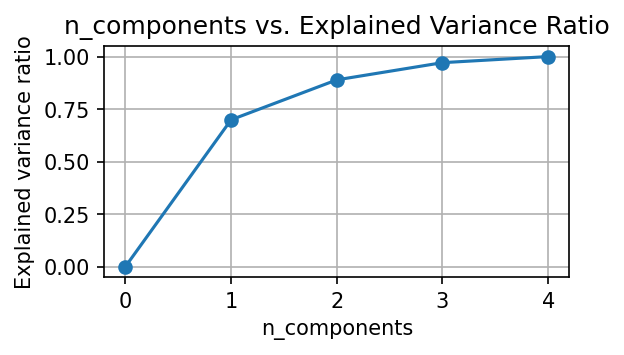

In [43]:
plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

- 6 · Decision Tree (DT C.45)

In [44]:
Result_C45 = DecisionTreeClassifier(criterion="gini", random_state=None).fit(TrainX, TrainY).predict(TestX)
Result_C45

array(['Dream', 'Torgersen', 'Torgersen', 'Biscoe', 'Dream', 'Dream',
       'Biscoe', 'Biscoe', 'Dream', 'Biscoe', 'Torgersen', 'Dream',
       'Dream', 'Dream', 'Dream', 'Biscoe', 'Biscoe', 'Biscoe',
       'Torgersen', 'Torgersen', 'Dream', 'Biscoe', 'Dream', 'Biscoe',
       'Biscoe', 'Torgersen', 'Biscoe', 'Dream', 'Dream', 'Dream',
       'Biscoe', 'Dream', 'Biscoe', 'Biscoe', 'Biscoe'], dtype=object)

In [45]:
Conf_C45 = confusion_matrix(TestY, Result_C45)
Conf_C45

array([[14,  1,  2],
       [ 0, 10,  3],
       [ 1,  3,  1]], dtype=int64)

In [46]:
print(confusion_matrix(TestY, Result_C45))

[[14  1  2]
 [ 0 10  3]
 [ 1  3  1]]


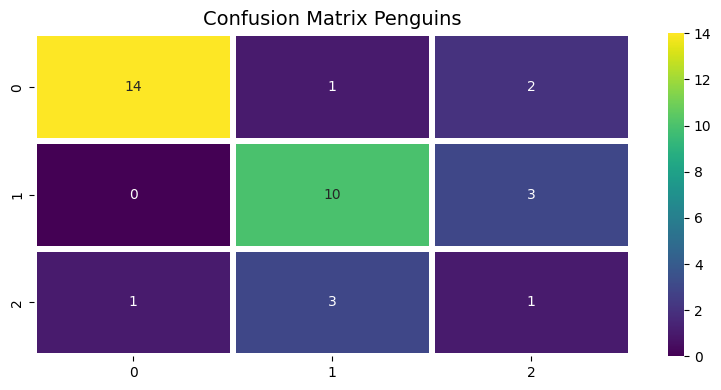

In [47]:
# Barplot - Countplot
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(Conf_C45, annot=True,  cmap="viridis", linewidths=3)
# Set Label
ax.set_title("Confusion Matrix Penguins", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(False)

# Show Plot
plt.tight_layout()
plt.show()

In [48]:
print(classification_report(y_true=TestY, y_pred=Result_C45))

              precision    recall  f1-score   support

      Biscoe       0.93      0.82      0.88        17
       Dream       0.71      0.77      0.74        13
   Torgersen       0.17      0.20      0.18         5

    accuracy                           0.71        35
   macro avg       0.60      0.60      0.60        35
weighted avg       0.74      0.71      0.73        35



- 7 · K - Nearest Neighbor (KNN)

In [49]:
Process_KNN = KNeighborsClassifier(n_neighbors=2).fit(TrainX, TrainY)
Process_KNN

KNeighborsClassifier(n_neighbors=2)

In [50]:
Result_KNN = Process_KNN.predict(TestX)
Result_KNN

array(['Dream', 'Biscoe', 'Dream', 'Biscoe', 'Biscoe', 'Dream', 'Biscoe',
       'Biscoe', 'Dream', 'Biscoe', 'Biscoe', 'Dream', 'Dream', 'Dream',
       'Biscoe', 'Biscoe', 'Biscoe', 'Dream', 'Torgersen', 'Dream',
       'Biscoe', 'Biscoe', 'Dream', 'Biscoe', 'Biscoe', 'Dream', 'Biscoe',
       'Dream', 'Dream', 'Dream', 'Dream', 'Biscoe', 'Biscoe', 'Biscoe',
       'Biscoe'], dtype=object)

In [51]:
Conf_KNN = confusion_matrix(TestY, Result_KNN)
Conf_KNN

array([[14,  3,  0],
       [ 3, 10,  0],
       [ 2,  2,  1]], dtype=int64)

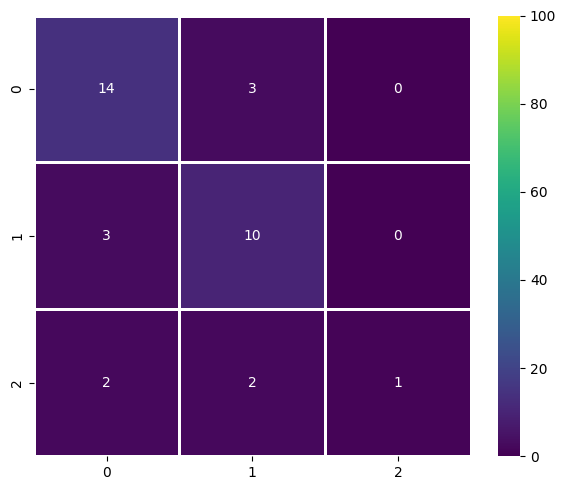

In [52]:

fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(Conf_KNN, cmap="viridis", annot=True, linewidths=1, vmin=0, vmax=100)
plt.tight_layout()
plt.show()


In [53]:
print(classification_report(y_true=TestY, y_pred=Result_KNN))

              precision    recall  f1-score   support

      Biscoe       0.74      0.82      0.78        17
       Dream       0.67      0.77      0.71        13
   Torgersen       1.00      0.20      0.33         5

    accuracy                           0.71        35
   macro avg       0.80      0.60      0.61        35
weighted avg       0.75      0.71      0.69        35



In [54]:
TrainX_PCA = Result_PCA.transform(TrainX)
TestX_PCA = Result_PCA.transform(TestX)
Process_KNN.fit(TrainX_PCA, TrainY)

# Prediksi pada data test
Result_PCA = Process_KNN.predict(TestX_PCA)

In [55]:
print(classification_report(y_true=TestY, y_pred=Result_PCA))

              precision    recall  f1-score   support

      Biscoe       0.74      0.82      0.78        17
       Dream       0.67      0.77      0.71        13
   Torgersen       1.00      0.20      0.33         5

    accuracy                           0.71        35
   macro avg       0.80      0.60      0.61        35
weighted avg       0.75      0.71      0.69        35



- 7 · Gaussian Naive Bayes (NB)

In [56]:
Result_NB = GaussianNB().fit(TrainX, TrainY).predict(TestX)
Result_NB

array(['Dream', 'Dream', 'Dream', 'Biscoe', 'Torgersen', 'Dream',
       'Biscoe', 'Biscoe', 'Dream', 'Dream', 'Torgersen', 'Dream',
       'Torgersen', 'Dream', 'Dream', 'Biscoe', 'Biscoe', 'Biscoe',
       'Torgersen', 'Torgersen', 'Dream', 'Biscoe', 'Dream', 'Biscoe',
       'Biscoe', 'Torgersen', 'Biscoe', 'Dream', 'Dream', 'Dream',
       'Dream', 'Dream', 'Biscoe', 'Biscoe', 'Biscoe'], dtype='<U9')

In [57]:
Conf_NB = confusion_matrix(TestY, Result_NB)
Conf_NB

array([[12,  4,  1],
       [ 0,  9,  4],
       [ 1,  3,  1]], dtype=int64)

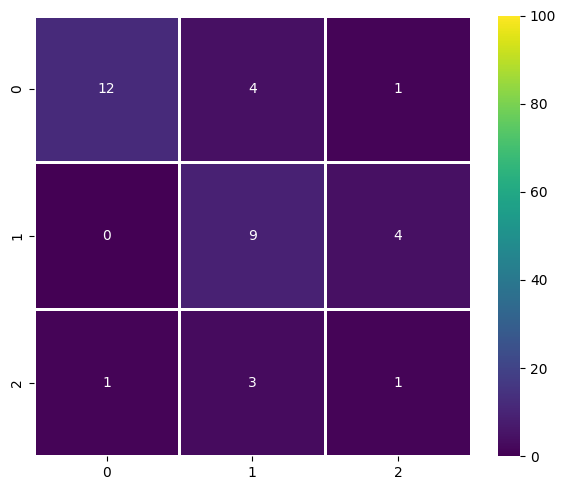

In [58]:

fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(Conf_NB, cmap="viridis", annot=True, linewidths=1, vmin=0, vmax=100)
plt.tight_layout()
plt.show()

In [59]:
print(classification_report(y_true=TestY, y_pred=Result_NB))

              precision    recall  f1-score   support

      Biscoe       0.92      0.71      0.80        17
       Dream       0.56      0.69      0.62        13
   Torgersen       0.17      0.20      0.18         5

    accuracy                           0.63        35
   macro avg       0.55      0.53      0.53        35
weighted avg       0.68      0.63      0.65        35



~~~

___

```

### Perbandingan Klasifikasi Algoritma

##### SVC

In [60]:
print("Akurasi  : ", np.round(accuracy_score(TestY, Result_SVC), 2))
print("Presisi  : ", np.round(precision_score(TestY, Result_SVC, average='macro'), 2))
print("Recall   : ", np.round(recall_score(TestY, Result_SVC, average='macro'), 2))
print("F1-Score : ", np.round(f1_score(TestY, Result_SVC, average='macro'), 2))

Akurasi  :  0.71
Presisi  :  0.52
Recall   :  0.57
F1-Score :  0.52


c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### LR

In [61]:
print("Akurasi  : ", np.round(accuracy_score(TestY, Result_LR), 2))
print("Presisi  : ", np.round(precision_score(TestY, Result_LR, average='macro'), 2))
print("Recall   : ", np.round(recall_score(TestY, Result_LR, average='macro'), 2))
print("F1-Score : ", np.round(f1_score(TestY, Result_LR, average='macro'), 2))

Akurasi  :  0.71
Presisi  :  0.5
Recall   :  0.57
F1-Score :  0.51


c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### QDA

In [62]:
print("Akurasi  : ", np.round(accuracy_score(TestY, Result_QDA), 2))
print("Presisi  : ", np.round(precision_score(TestY, Result_QDA, average='macro'), 2))
print("Recall   : ", np.round(recall_score(TestY, Result_QDA, average='macro'), 2))
print("F1-Score : ", np.round(f1_score(TestY, Result_QDA, average='macro'), 2))

Akurasi  :  0.69
Presisi  :  0.6
Recall   :  0.58
F1-Score :  0.58


##### LDA

In [63]:
print("Akurasi  : ", np.round(accuracy_score(TestY, Result_LDA), 2))
print("Presisi  : ", np.round(precision_score(TestY, Result_LDA, average='macro'), 2))
print("Recall   : ", np.round(recall_score(TestY, Result_LDA, average='macro'), 2))
print("F1-Score : ", np.round(f1_score(TestY, Result_LDA, average='macro'), 2))

Akurasi  :  0.71
Presisi  :  0.67
Recall   :  0.65
F1-Score :  0.65


##### DT

In [64]:
print("Akurasi  : ", np.round(accuracy_score(TestY, Result_C45), 2))
print("Presisi  : ", np.round(precision_score(TestY, Result_C45, average='macro'), 2))
print("Recall   : ", np.round(recall_score(TestY, Result_C45, average='macro'), 2))
print("F1-Score : ", np.round(f1_score(TestY, Result_C45, average='macro'), 2))

Akurasi  :  0.71
Presisi  :  0.6
Recall   :  0.6
F1-Score :  0.6


##### PCA

In [65]:
print("Akurasi  : ", np.round(accuracy_score(TestY, Result_PCA), 2))
print("Presisi  : ", np.round(precision_score(TestY, Result_PCA, average='macro'), 2))
print("Recall   : ", np.round(recall_score(TestY, Result_PCA, average='macro'), 2))
print("F1-Score : ", np.round(f1_score(TestY, Result_PCA, average='macro'), 2))

Akurasi  :  0.71
Presisi  :  0.8
Recall   :  0.6
F1-Score :  0.61


##### KNN

In [66]:
print("Akurasi  : ", np.round(accuracy_score(TestY, Result_KNN), 2))
print("Presisi  : ", np.round(precision_score(TestY, Result_KNN, average='macro'), 2))
print("Recall   : ", np.round(recall_score(TestY, Result_KNN, average='macro'), 2))
print("F1-Score : ", np.round(f1_score(TestY, Result_KNN, average='macro'), 2))

Akurasi  :  0.71
Presisi  :  0.8
Recall   :  0.6
F1-Score :  0.61


##### NB

In [67]:
print("Akurasi  : ", np.round(accuracy_score(TestY, Result_NB), 2))
print("Presisi  : ", np.round(precision_score(TestY, Result_NB, average='macro'), 2))
print("Recall   : ", np.round(recall_score(TestY, Result_NB, average='macro'), 2))
print("F1-Score : ", np.round(f1_score(TestY, Result_NB, average='macro'), 2))

Akurasi  :  0.63
Presisi  :  0.55
Recall   :  0.53
F1-Score :  0.53
